In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 39.5 MB/s 
     |████████████████████████████████| 7.8 MB 81.5 MB/s 
     |████████████████████████████████| 16.6 MB 66.6 MB/s 


In [2]:
import matplotlib.font_manager

In [3]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=b288d1a41685b1415c9043da3d476ee730c00c042c63dbbd20f19cd411351d7f
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [5]:
fp = "drive/MyDrive/Colab Notebooks/Indianstate/India_State_Boundary.shp"
map_df = gpd.read_file(fp)
map_df.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [6]:
map_df.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
map_df = map_df.to_crs("EPSG:3395")

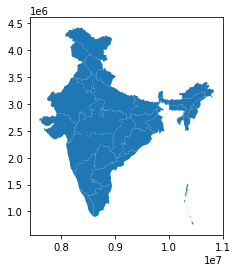

In [8]:
map_df = map_df[['State_Name', 'geometry']]
map_df.plot()

In [9]:
map_df.State_Name

0                            Andaman & Nicobar
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                        Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                   Tamilnadu
14                               Chhattishgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

In [10]:
map_df['State_Name'] = map_df['State_Name'].str.upper()
map_df.head()

,State_Name,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400..."
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223..."
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212..."
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392..."


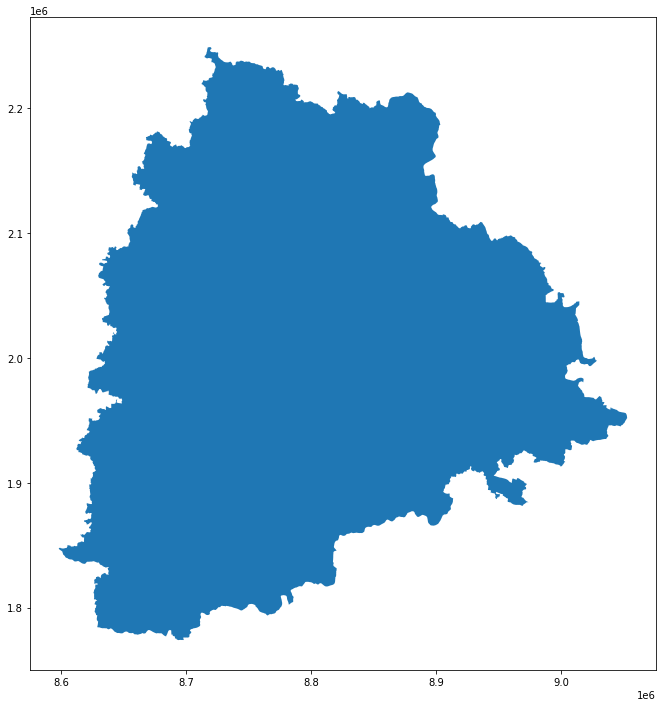

In [11]:
map_df[map_df['State_Name'] == 'TELENGANA'].plot(figsize=(12, 12))

In [12]:
map_df.State_Name

0                            ANDAMAN & NICOBAR
1                                   CHANDIGARH
2     DAMAN AND DIU AND DADRA AND NAGAR HAVELI
3                                        DELHI
4                                      HARYANA
5                                    JHARKHAND
6                                    KARNATAKA
7                                       KERALA
8                                  LAKSHADWEEP
9                               MADHYA PRADESH
10                                 MAHARASHTRA
11                                      ODISHA
12                                  PUDUCHERRY
13                                   TAMILNADU
14                               CHHATTISHGARH
15                                   TELENGANA
16                              ANDHRA PRADESH
17                                  PUDUCHERRY
18                                         GOA
19                            HIMACHAL PRADESH
20                                      PUNJAB
21           

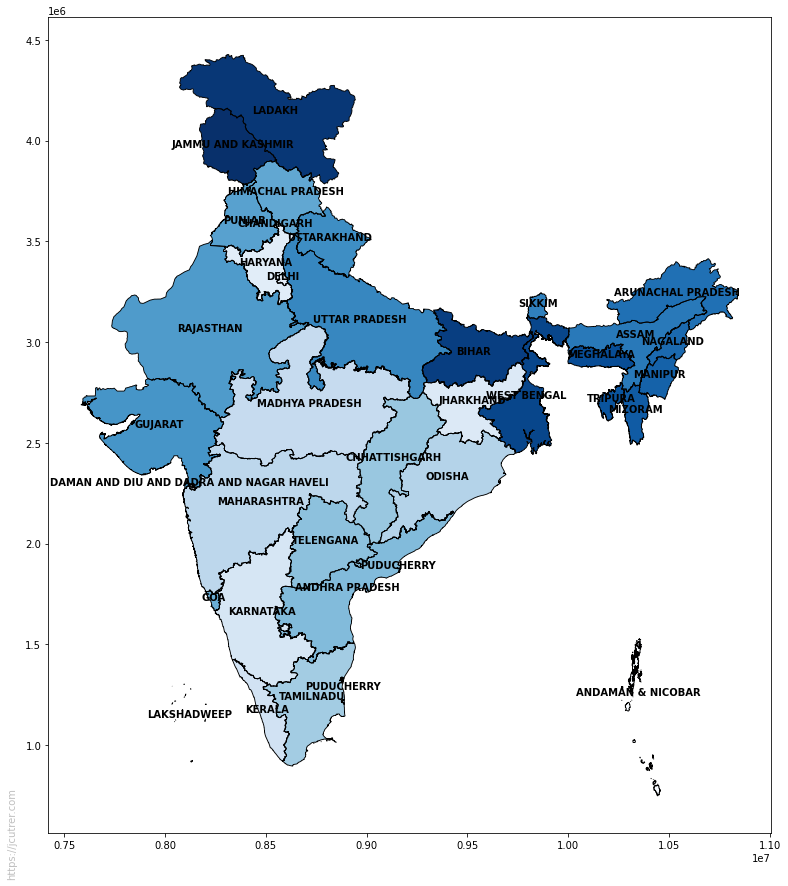

In [13]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(s=x.State_Name, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10,fontweight="bold"),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=.9)
map_df.plot(ax=ax, cmap='Blues', figsize=(12, 12))
ax.text(-0.05, 0., 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=10, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [14]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/dataset_original/RS_Session_257_AU_1387_2.csv")
df.head()

,Sl. No.,States &Uts,Civil Judge (Junior Division),Civil Judge (Senior Division),District Judge,Total_Judges,population,per_mil,state_code
0,1,Andhra Pradesh,254,91,95,440,49386799.0,9.0,AD
1,2,Arunachal Pradesh,7,4,1,12,1383727.0,9.0,AR
2,3,Delhi,166,20,95,281,16787941.0,17.0,DL
3,4,Karnataka,149,120,89,358,61095297.0,6.0,KA
4,5,Puducherry,2,0,3,5,1247953.0,5.0,PY


In [15]:
df['States &Uts'] = df['States &Uts'].str.upper()
df.fillna(0,inplace=True)
df.head()

,Sl. No.,States &Uts,Civil Judge (Junior Division),Civil Judge (Senior Division),District Judge,Total_Judges,population,per_mil,state_code
0,1,ANDHRA PRADESH,254,91,95,440,49386799.0,9.0,AD
1,2,ARUNACHAL PRADESH,7,4,1,12,1383727.0,9.0,AR
2,3,DELHI,166,20,95,281,16787941.0,17.0,DL
3,4,KARNATAKA,149,120,89,358,61095297.0,6.0,KA
4,5,PUDUCHERRY,2,0,3,5,1247953.0,5.0,PY


In [16]:
df.rename(columns = {'States &Uts':'State_Name'}, inplace = True)

df.shape

(37, 9)

In [17]:
df.head()

,Sl. No.,State_Name,Civil Judge (Junior Division),Civil Judge (Senior Division),District Judge,Total_Judges,population,per_mil,state_code
0,1,ANDHRA PRADESH,254,91,95,440,49386799.0,9.0,AD
1,2,ARUNACHAL PRADESH,7,4,1,12,1383727.0,9.0,AR
2,3,DELHI,166,20,95,281,16787941.0,17.0,DL
3,4,KARNATAKA,149,120,89,358,61095297.0,6.0,KA
4,5,PUDUCHERRY,2,0,3,5,1247953.0,5.0,PY


In [18]:
map_df = map_df.merge(df,on='State_Name')
map_df.head()

,State_Name,geometry,Sl. No.,Civil Judge (Junior Division),Civil Judge (Senior Division),District Judge,Total_Judges,population,per_mil,state_code
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1439992.056, 1034...",36,0,0,0,0,380581.0,0.0,AN
1,CHANDIGARH,"POLYGON ((8546255.616 3584178.689, 8546315.400...",20,7,0,4,11,1055450.0,11.0,CH
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2297594.513, 81223...",10,0,0,0,0,343709.0,0.0,DNHDD
3,DELHI,"POLYGON ((8583390.570 3338489.968, 8583476.212...",3,166,20,95,281,16787941.0,17.0,DL
4,HARYANA,"POLYGON ((8524318.539 3495065.089, 8524451.392...",23,70,59,52,181,25351462.0,8.0,HR


In [19]:
convert_dict = {'per_mil': int
                }
map_df = map_df.astype(convert_dict)

In [20]:
map_df.shape

(37, 10)

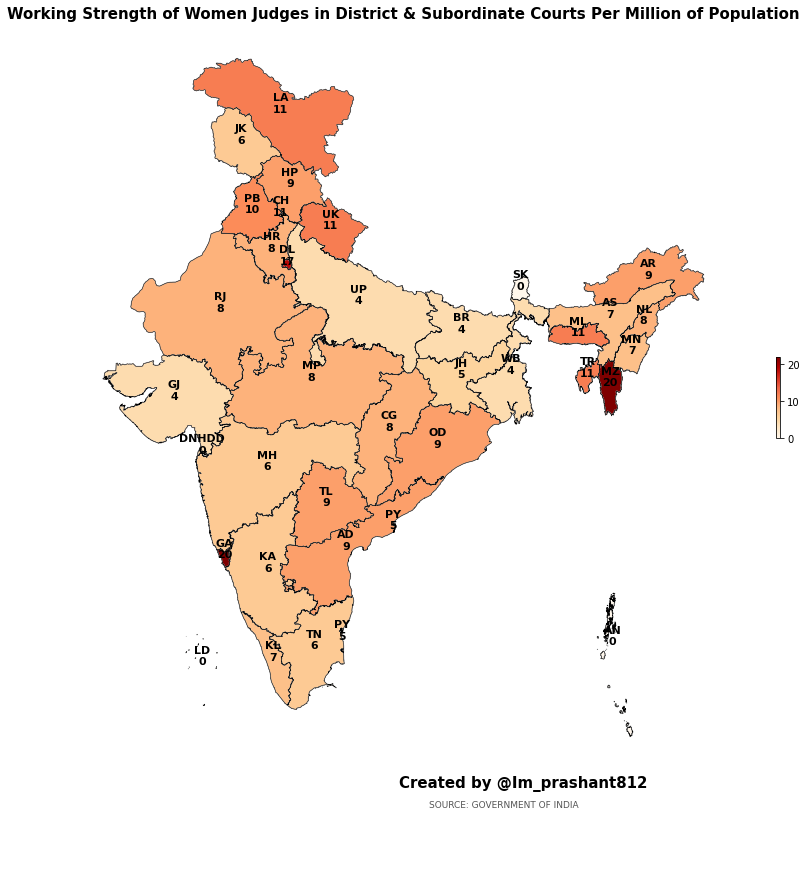

In [33]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()
map_df.apply(lambda x: ax.annotate(
    s=x.state_code + "\n" + str(x.per_mil), 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=11,fontweight="bold"
),axis=1);
map_df.boundary.plot(ax=ax, color='Black', linewidth=0.4)
map_df.plot(ax=ax, cmap='OrRd', figsize=(14, 14))


ax.axis('off')
ax.set_title('Working Strength of Women Judges in District & Subordinate Courts Per Million of Population', fontdict={'fontsize': '15', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('SOURCE: GOVERNMENT OF INDIA',xy=(0.53, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')

map_df.plot(column=map_df.per_mil, cmap='OrRd', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 22
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

#map_df.plot(column=Total_cases, cmap='Reds', linewidth=0.6, ax=ax, edgecolor='0.6', legend=True)

In [ ]:
Blue' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'oce...
